In [1]:
import numpy as np
import matplotlib.pyplot as plt
from healpix_geo.coordinates import latitude_authalic_to_geographic, latitude_geographic_to_authalic

In [2]:
authalic_lat = np.linspace(-np.pi/2, np.pi/2, int(1e6)) # range of authalic latitudes in radians used for distortion evaluation
authalic_lat

array([-1.57079633, -1.57079319, -1.57079004, ...,  1.57079004,
        1.57079319,  1.57079633], shape=(1000000,))

In [3]:
geographic_lat = latitude_authalic_to_geographic(authalic_lat, "WGS84")
geographic_lat

array([-90.        , -89.9998208 , -89.99964161, ...,  89.99964161,
        89.9998208 ,  90.        ], shape=(1000000,))

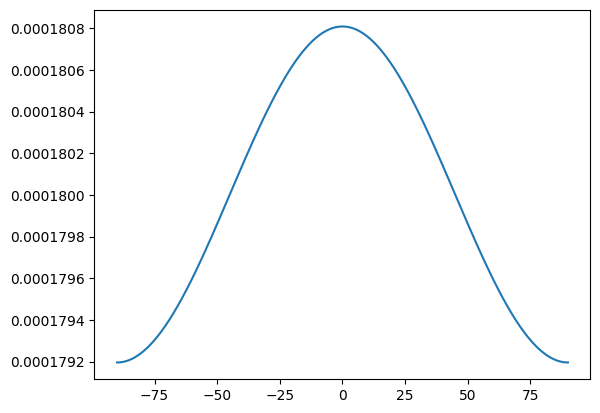

In [4]:
plt.plot(geographic_lat[:-1], np.diff(geographic_lat))

In [5]:
authalic_lat_roundtrip = latitude_geographic_to_authalic(geographic_lat, "WGS84")
authalic_lat_roundtrip

array([-1.57079633, -1.57079319, -1.57079004, ...,  1.57079004,
        1.57079319,  1.57079633], shape=(1000000,))

In [6]:
np.abs(authalic_lat_roundtrip-authalic_lat).max()

np.float64(4.440892098500626e-16)

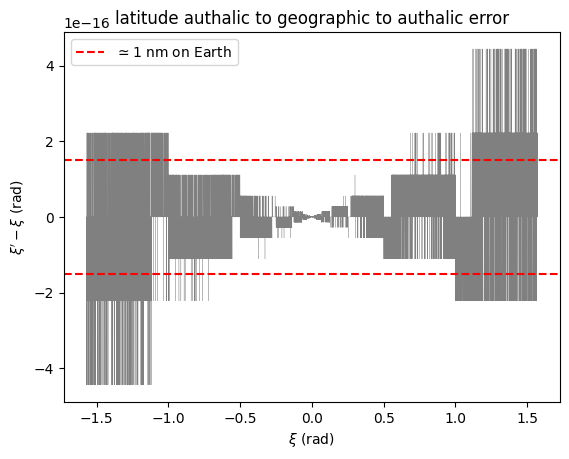

In [7]:
plt.title("latitude authalic to geographic to authalic error")
plt.plot(authalic_lat, authalic_lat_roundtrip-authalic_lat, lw=.2, c='gray')
plt.axhline(y=1.5e-16, ls='--', c='red', label=r"$\simeq 1$ nm on Earth")
plt.axhline(y=-1.5e-16, ls='--', c='red')
plt.xlabel(r"$\xi$ (rad)")
plt.ylabel(r"$\xi'-\xi$ (rad)")
plt.legend()
plt.show()